Using python to prepare data before processing using the US census data. Notes.

In [1]:
import pandas as pd
import seaborn as sns
import os

In [2]:
# Read the csv file using pandas

census_data = pd.read_csv('../datasets/dsets(copy)/adult-census.csv')

#display it
census_data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#the column class is our target

census_data['class'].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [4]:
#place it in a variable
target = census_data['class']

#put all the features into a seprate variable
features = census_data.drop(columns='class')

features

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [5]:
#seprate neumeric
num_feat = features.select_dtypes(include='number')

num_feat

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30
...,...,...,...,...,...
48837,27,12,0,0,38
48838,40,9,0,0,40
48839,58,9,0,0,40
48840,22,9,0,0,20


In [6]:
#seprate class
class_feat = features.select_dtypes(exclude='number')

class_feat

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


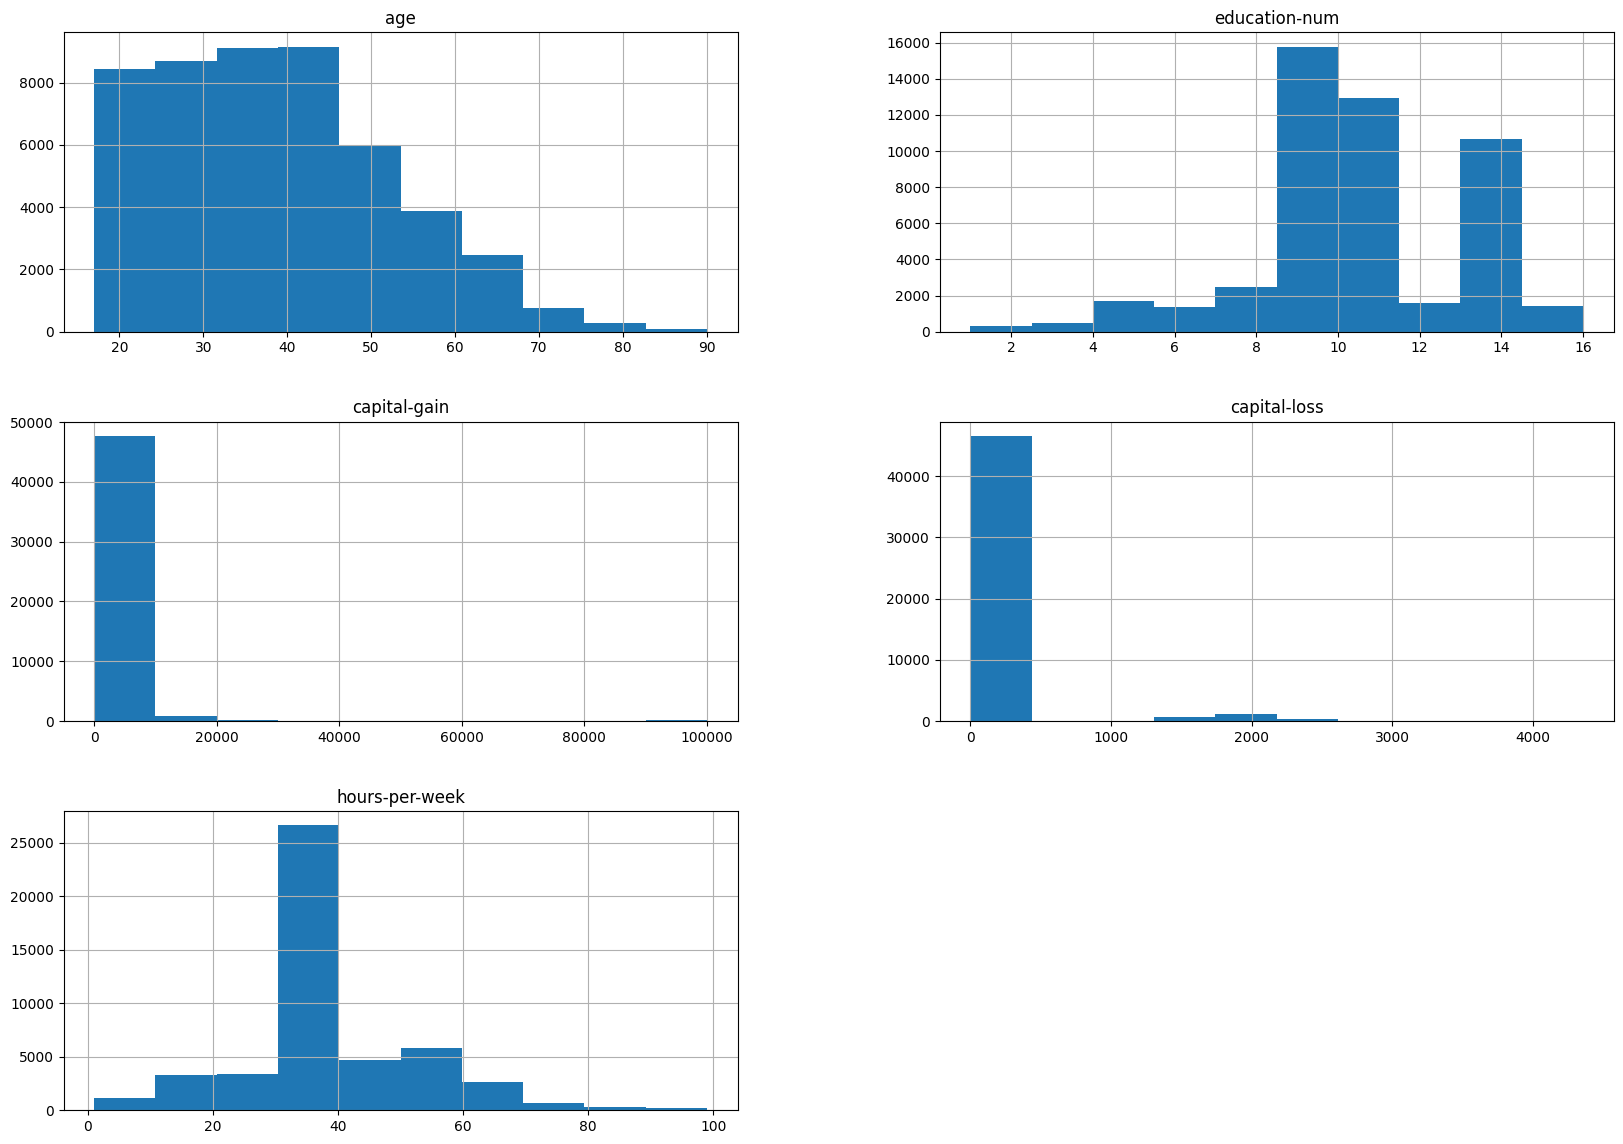

In [7]:
# make a histogram of neumerical variables
# assign the values to _ variable
out = num_feat.hist(figsize=(20, 14))

In [ ]:
#frequency of each row
class_feat.value_counts()

workclass    education     marital-status         occupation         relationship   race                sex     native-country
Private      HS-grad       Married-civ-spouse     Craft-repair       Husband        White               Male    United-States     1190
             Bachelors     Married-civ-spouse     Exec-managerial    Husband        White               Male    United-States      653
             HS-grad       Married-civ-spouse     Machine-op-inspct  Husband        White               Male    United-States      540
                                                  Transport-moving   Husband        White               Male    United-States      504
             Some-college  Married-civ-spouse     Craft-repair       Husband        White               Male    United-States      498
                                                                                                                                  ... 
             Assoc-acdm    Divorced               Adm-clerical 

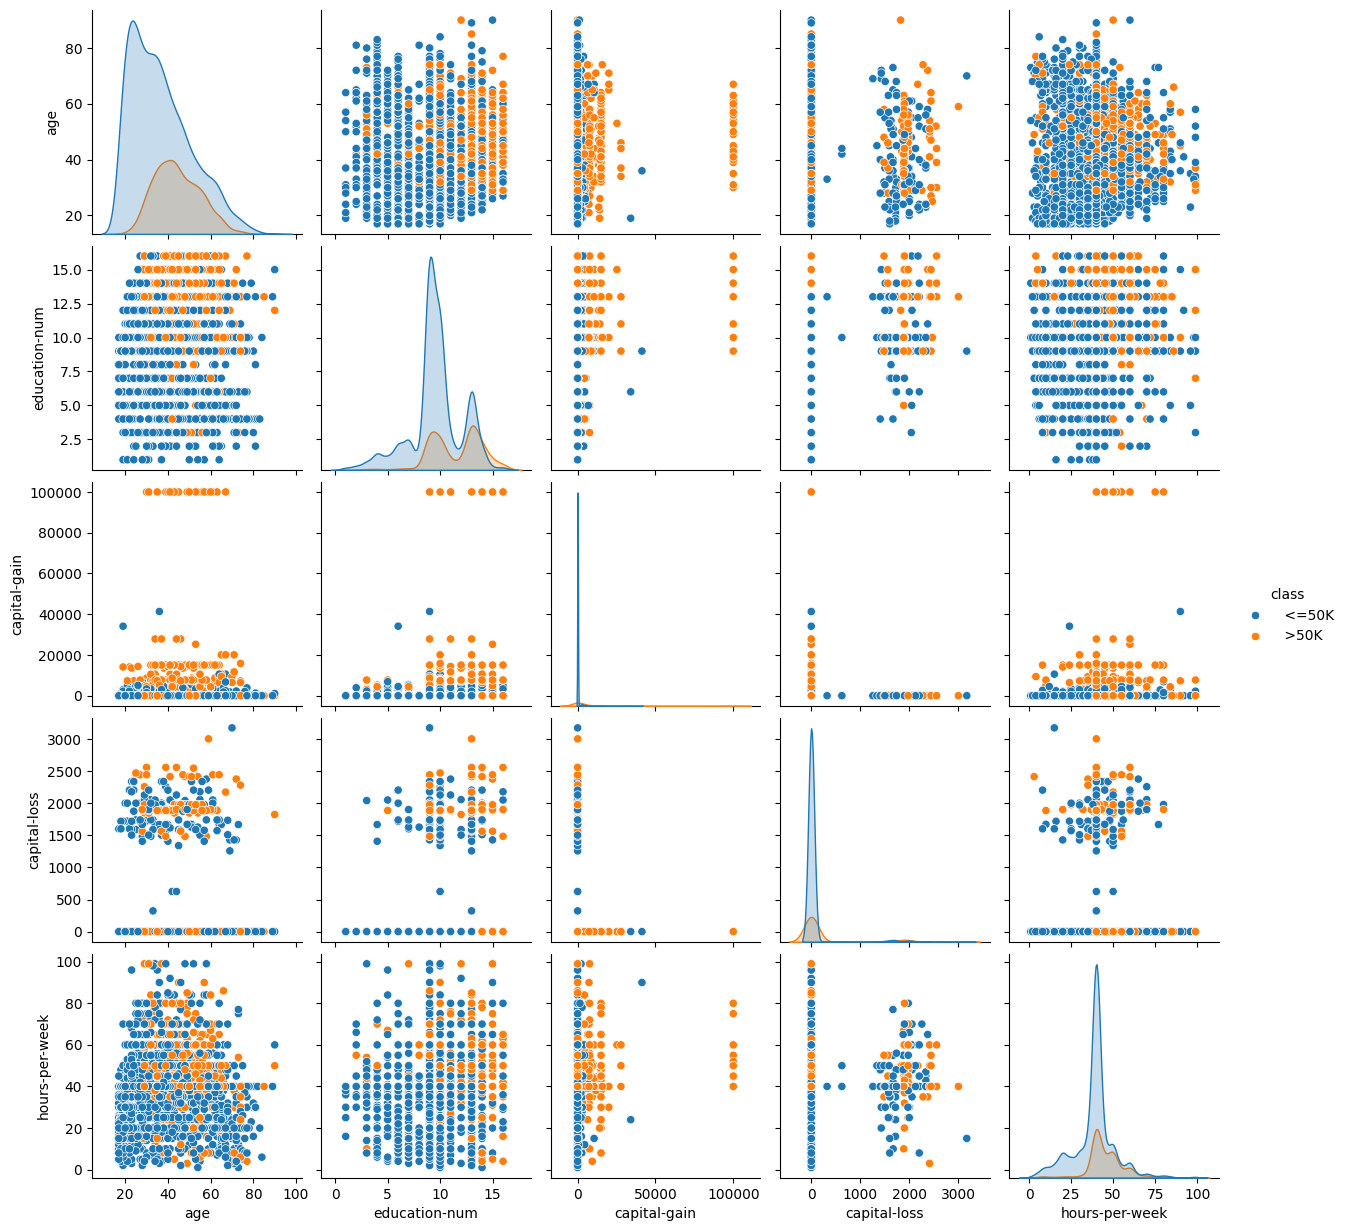

In [ ]:
#use seaborn to make a pairplot

#make a new dataframe for it
plot_df = num_feat.copy()
plot_df["class"] = target

#plot it by giving it the first 5000 values and split the color by "class"
sns.pairplot(
    data=plot_df.iloc[:5000],
    vars=num_feat.columns,
    hue="class"
)